<a href="https://colab.research.google.com/github/2303a51975/AIML-2025_B15/blob/main/2303a51975_AIML_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA


In [18]:
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
knn = KNeighborsClassifier(n_neighbors=3)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred = knn.predict(X_test)

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=3: {accuracy * 100:.2f}%")


Accuracy with k=3: 100.00%


In [27]:
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

In [28]:
knn.fit(X_train_2d, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
def plot_decision_boundary(X, y, classifier, ax=None, title="Decision Boundary"):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

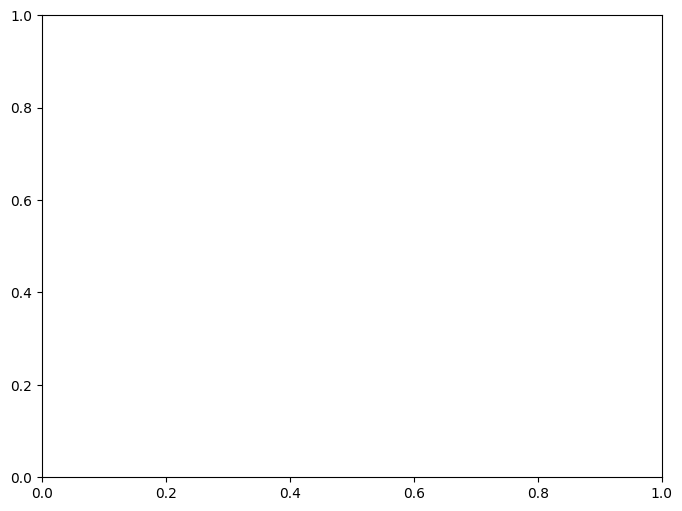

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
scatter = plot_decision_boundary(X_train_2d, y_train, knn, ax=ax, title="KNN with k=3 Decision Boundary")

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


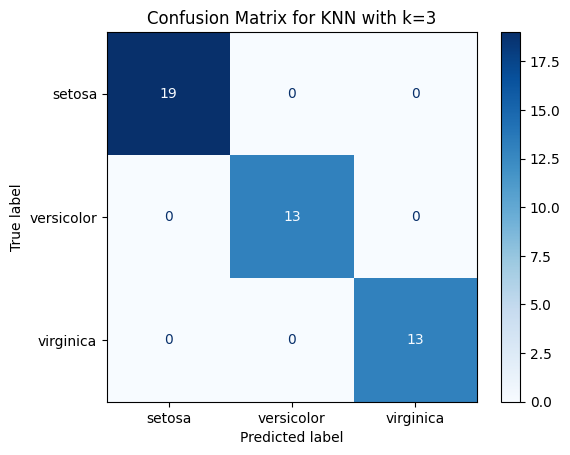

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for KNN with k=3")
plt.show()


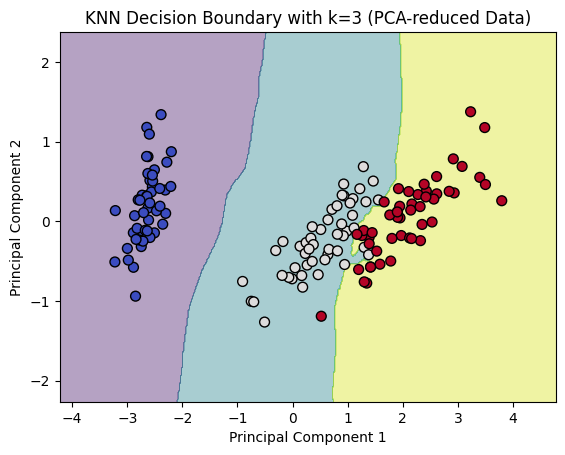

In [14]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_2d, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_2d, y_train)
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.coolwarm)
plt.title("KNN Decision Boundary with k=3 (PCA-reduced Data)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


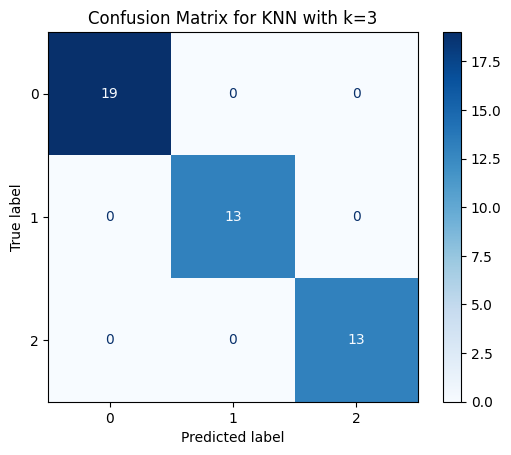

In [15]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for KNN with k=3")
plt.show()


In [38]:
knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = knn_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
print(f"Accuracy without feature scaling: {accuracy_no_scaling * 100:.2f}%")

Accuracy without feature scaling: 100.00%


In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling (k=3): {accuracy_scaled:.2f}")
print(f"Accuracy without scaling (k=3): {accuracy:.2f}")

Accuracy with scaling (k=3): 1.00
Accuracy without scaling (k=3): 1.00


In [41]:
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train, y_train)
y_pred_k5 = knn_k5.predict(X_test)
accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print(f"Accuracy with k=5: {accuracy_k5 * 100:.2f}%")

Accuracy with k=5: 100.00%


In [17]:
knn_k5 = KNeighborsClassifier(n_neighbors=5)
knn_k5.fit(X_train, y_train)
y_pred_k5 = knn_k5.predict(X_test)
accuracy_k5 = accuracy_score(y_test, y_pred_k5)
print(f"Accuracy with k=5: {accuracy_k5:.2f}")
print(f"Accuracy with k=3: {accuracy:.2f}")
print(f"Accuracy with k=5: {accuracy_k5:.2f}")

Accuracy with k=5: 1.00
Accuracy with k=3: 1.00
Accuracy with k=5: 1.00
